In [11]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.extend(['../', '../../'])
from cb_model import ConvertibleBondPricer
from TW_cb_backtest import TaiwanCBStrategy


In [6]:
# 讀取CB資料
path_cb_2610 = r'C:\Users\User\Desktop\CB-pricing\CB data\cb_2610_test.csv'
cb_df_2610 = pd.read_csv(path_cb_2610)
cb_df_2610


,Unnamed: 0,公司代碼,簡稱,年月,最近一期轉換價格日,最近一期配股基準日,首次發行(Y/N),發行總額(1000),到目前餘額(1000),轉換價格,...,賣回價%(五),賣回收益率五,賣回日起(六),賣回日迄(六),賣回價%(六),賣回收益率六,賣回日起(七),賣回日迄(七),賣回價%(七),賣回收益率七
0,36495,26101,華航一甲,199701,19970118,1997/01/25,N,1000000,1000000,36.7,...,-,-,,,-,-,,,-,-
1,36496,26101,華航一甲,199702,19970118,1997/01/25,N,1000000,1000000,36.7,...,-,-,,,-,-,,,-,-
2,36497,26101,華航一甲,199703,19970118,1997/01/25,N,1000000,1000000,36.7,...,-,-,,,-,-,,,-,-
3,36498,26101,華航一甲,199704,19970118,1997/01/25,N,1000000,1000000,36.7,...,-,-,,,-,-,,,-,-
4,36499,26101,華航一甲,199705,19970118,1997/01/25,N,1000000,990000,36.7,...,-,-,,,-,-,,,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,36937,26107,華航七,202407,20240724,2024/07/24,N,4500000,1598100,17.5,...,-,-,,,-,-,,,-,-
438,36938,26107,華航七,202408,20240724,2024/07/24,N,4500000,1596400,17.5,...,-,-,,,-,-,,,-,-
439,36939,26107,華航七,202409,20240724,2024/07/24,N,4500000,1596400,17.5,...,-,-,,,-,-,,,-,-
440,36940,26107,華航七,202410,20240724,2024/07/24,N,4500000,1596400,17.5,...,-,-,,,-,-,,,-,-


c:\Users\User\Desktop\CB-pricing\TW_cb_backtest.py:243: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\User\Desktop\CB-pricing\TW_cb_backtest.py:243: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\User\Desktop\CB-pricing\TW_cb_backtest.py:243: UserWarning: Glyph 38577 (\N{CJK UNIFIED IDEOGRAPH-96B1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\User\Desktop\CB-pricing\TW_cb_backtest.py:243: UserWarning: Glyph 21547 (\N{CJK UNIFIED IDEOGRAPH-542B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\User\Desktop\CB-pricing\TW_cb_backtest.py:243: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\User\Desktop\CB-pricing\TW_cb_backtest.py:243: UserWarning: Glyph 21205 (\N{CJK UNIFIED IDEOGRAPH-52D5}) missing from font(s) DejaVu Sans.
  plt.t

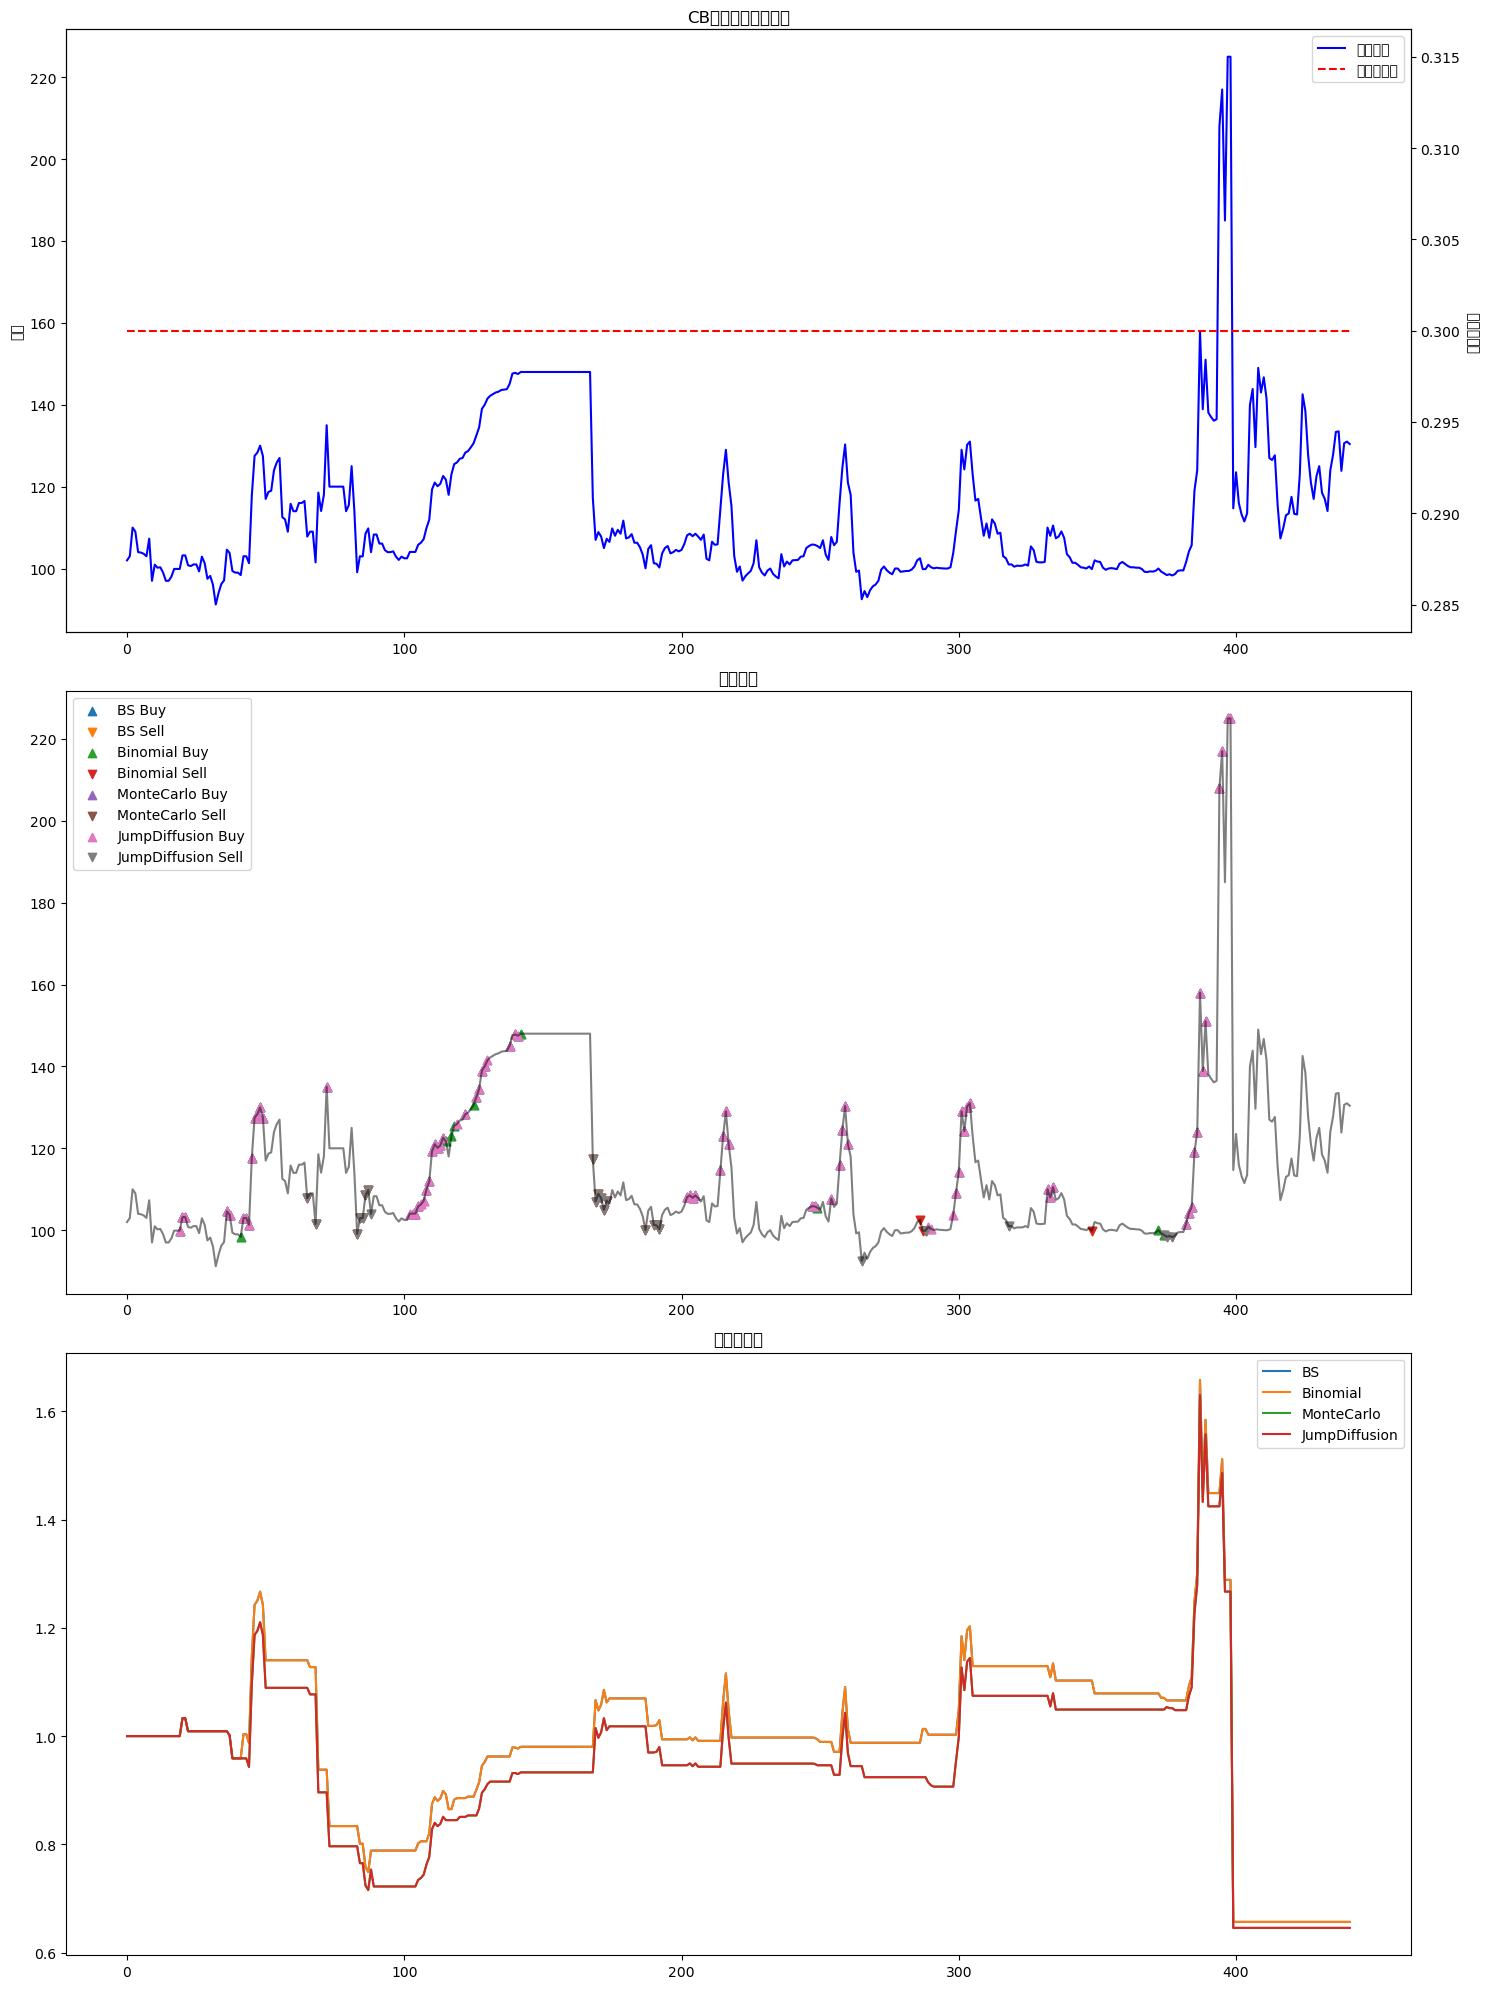

,BS,Binomial,MonteCarlo,JumpDiffusion
Sharpe Ratio,-0.0817,-0.0817,-0.0984,-0.0984
Max Drawdown,0.6037,0.6037,0.6037,0.6037
Win Rate,0.1131,0.1131,0.1154,0.1154
Avg Return,-0.0462,-0.0462,-0.0557,-0.0557
Trading Frequency,0.2217,0.2217,0.2262,0.2262


In [ ]:

# 初始化策略
strategy = TaiwanCBStrategy()



In [ ]:
# 準備分析資料
analysis_data = strategy.prepare_data(cb_df_2610)

In [ ]:
# 評估各種定價模型
trading_opportunities = strategy.evaluate_pricing_models(analysis_data)


In [ ]:
# 繪製結果
strategy.plot_results(analysis_data, trading_opportunities)

In [ ]:
# 分析各模型的績效指標
performance_metrics = {}
for model in ['BS', 'Binomial', 'MonteCarlo', 'JumpDiffusion']:
    returns = trading_opportunities[f'{model}_returns']
    performance_metrics[model] = {
        'Sharpe Ratio': np.sqrt(252) * returns.mean() / returns.std(),
        'Max Drawdown': (1 - trading_opportunities[f'{model}_cumulative_returns'] / 
                        trading_opportunities[f'{model}_cumulative_returns'].cummax()).max(),
        'Win Rate': (returns > 0).mean(),
        'Avg Return': returns.mean() * 252,  # 年化收益率
        'Trading Frequency': (trading_opportunities[f'{model}_signal'] != 0).mean()
    }

pd.DataFrame(performance_metrics).round(4)